<a href="https://colab.research.google.com/github/MWFK/TimeSeries_Sequence_with_TensorFlow/blob/main/5_TimeSeries_Sequences_Benchmarking_Algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credits

In [1]:
# Author: Mouafek Ayadi (but not the original code creator!)
# Contact: mouafek.ayadi@esprit.tn 
#          https://www.linkedin.com/in/mouafek-ayadi/
# Date: 2019/2020

# The source Code have been developed based on deeplearning.ai courses materials, tensorflow.org documentation and other open source resources. 
# that have been carefully documented in a separate document that you should find it alongside this notebook.
# The original code is under the Apache License, Version 2.0 (the "License");

# Librairies

In [2]:
import tensorflow as tf
print(tf.__version__)

import csv
import numpy as np
import matplotlib.pyplot as plt

2.5.0


# Visualization Function

In [3]:
def plot_series(time, series, title, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

# Download Dataset

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv \
    -O /tmp/sunspots.csv

--2021-08-09 08:59:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 74.125.137.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70827 (69K) [application/octet-stream]
Saving to: ‘/tmp/sunspots.csv’

/tmp/sunspots.csv   100%[===================>]  69.17K  --.-KB/s    in 0.007s  

2021-08-09 08:59:25 (10.4 MB/s) - ‘/tmp/sunspots.csv’ saved [70827/70827]



# Import & Visualize Data

Row
['0', '1749-01-31', '96.7']
['1', '1749-02-28', '104.3']
['2', '1749-03-31', '116.7']
['3', '1749-04-30', '92.8']
['4', '1749-05-31', '141.7']
['5', '1749-06-30', '139.2']
['6', '1749-07-31', '158.0']
['7', '1749-08-31', '110.5']
['8', '1749-09-30', '126.5']
['9', '1749-10-31', '125.8']
['10', '1749-11-30', '264.3']
['11', '1749-12-31', '142.0']
['12', '1750-01-31', '122.2']
['13', '1750-02-28', '126.5']
['14', '1750-03-31', '148.7']
['15', '1750-04-30', '147.2']
['16', '1750-05-31', '150.0']
['17', '1750-06-30', '166.7']
['18', '1750-07-31', '142.3']
['19', '1750-08-31', '171.7']
['20', '1750-09-30', '152.0']
['21', '1750-10-31', '109.5']
['22', '1750-11-30', '105.5']
['23', '1750-12-31', '125.7']
['24', '1751-01-31', '116.7']
['25', '1751-02-28', '72.5']
['26', '1751-03-31', '75.5']
['27', '1751-04-30', '94.0']
['28', '1751-05-31', '101.2']
['29', '1751-06-30', '84.5']
['30', '1751-07-31', '110.5']
['31', '1751-08-31', '99.7']
['32', '1751-09-30', '39.2']
['33', '1751-10-31', '38

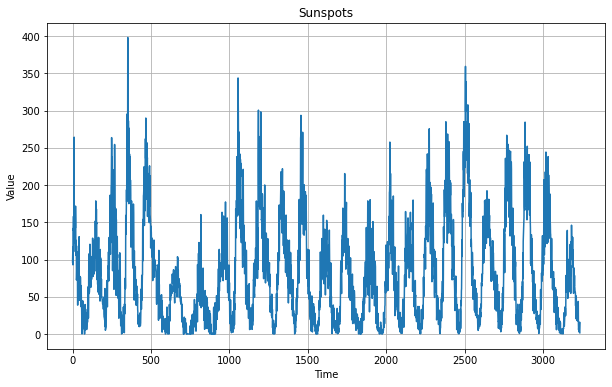

In [26]:
time_step = []
sunspots = []

with open('/tmp/sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  print('Row')
  for row in reader:
    print(row)
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

print('Sunspots\n', sunspots)
print('Time_Step\n', time_step)

# Convert to numpy array so it's works with tensorflow afterwards
series = np.array(sunspots)
time = np.array(time_step)
print('series\n', series)
print('time\n', time)

title = "Sunspots"
plt.figure(figsize=(10, 6))
plot_series(time, series, title)

print(series.shape)
print(time.shape)

# Split Data

In [27]:
split_time = 2500 # We have 10 years worth of data (3650) so the split time is more 75% 

time_train = time[:split_time] # 0..2500    => 2500
x_train    = series[:split_time] 
time_valid = time[split_time:] # 2501..3650 => 1150
x_valid    = series[split_time:]

window_size         = 30 
batch_size          = 32
shuffle_buffer_size = 1000

# Create a window

In [37]:
########################################################### [1]
# print(series)
# array([ 96.7, 104.3, 116.7, ...,  13.2,  15.9,   1.6])

# series = tf.expand_dims(series, axis=-1)
# print(series)
# array([[ 96.7],
#       [104.3],
#       [116.7],
#       ...,
#       [ 13.2],
#       [ 15.9],
#       [  1.6]])>


# tf.expand_dims(input, axis, name=None)
# image = tf.zeros([10,10,3])

# tf.expand_dims(image, axis=0).shape.as_list()
# [1, 10,10,3]

# tf.expand_dims(image, axis=1).shape.as_list()
# [10, 1,10,3]

# tf.expand_dims(image, axis=-1).shape.as_list()
# [10,10,3, 1]

In [36]:
########################################################### [2]
dataset = tf.data.Dataset.from_tensor_slices([1,2,3])
for element in dataset:
  print(element)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [60]:
############################################################ [3]

# Initialize the series again
sunspots = []
with open('/tmp/sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    sunspots.append(float(row[2]))
series = np.array(sunspots)

# Test the flat_map function
# dataset = tf.data.Dataset.from_tensor_slices([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# for element in dataset:
#   print(element)

# dataset = dataset.flat_map(lambda x: tf.data.Dataset.from_tensor_slices(x))
# list(dataset.as_numpy_iterator())

import time
series = tf.expand_dims(series, axis=-1)                      # [1] explanation above  
ds = tf.data.Dataset.from_tensor_slices(series)               # [2] explanation above
ds = ds.window(window_size + 1, shift=1, drop_remainder=True) # window slide by one step each time
ds = ds.flat_map(lambda w: w.batch(window_size + 1))          # [3] each tensor will have this shape (31,1)
for element in ds:
  print(element)

tf.Tensor(
[[ 96.7]
 [104.3]
 [116.7]
 [ 92.8]
 [141.7]
 [139.2]
 [158. ]
 [110.5]
 [126.5]
 [125.8]
 [264.3]
 [142. ]
 [122.2]
 [126.5]
 [148.7]
 [147.2]
 [150. ]
 [166.7]
 [142.3]
 [171.7]
 [152. ]
 [109.5]
 [105.5]
 [125.7]
 [116.7]
 [ 72.5]
 [ 75.5]
 [ 94. ]
 [101.2]
 [ 84.5]], shape=(30, 1), dtype=float64)
tf.Tensor(
[[104.3]
 [116.7]
 [ 92.8]
 [141.7]
 [139.2]
 [158. ]
 [110.5]
 [126.5]
 [125.8]
 [264.3]
 [142. ]
 [122.2]
 [126.5]
 [148.7]
 [147.2]
 [150. ]
 [166.7]
 [142.3]
 [171.7]
 [152. ]
 [109.5]
 [105.5]
 [125.7]
 [116.7]
 [ 72.5]
 [ 75.5]
 [ 94. ]
 [101.2]
 [ 84.5]
 [110.5]], shape=(30, 1), dtype=float64)
tf.Tensor(
[[116.7]
 [ 92.8]
 [141.7]
 [139.2]
 [158. ]
 [110.5]
 [126.5]
 [125.8]
 [264.3]
 [142. ]
 [122.2]
 [126.5]
 [148.7]
 [147.2]
 [150. ]
 [166.7]
 [142.3]
 [171.7]
 [152. ]
 [109.5]
 [105.5]
 [125.7]
 [116.7]
 [ 72.5]
 [ 75.5]
 [ 94. ]
 [101.2]
 [ 84.5]
 [110.5]
 [ 99.7]], shape=(30, 1), dtype=float64)


KeyboardInterrupt: ignored

In [65]:
############################################################ [4]

# Initialize the series again
sunspots = []
with open('/tmp/sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    sunspots.append(float(row[2]))
series = np.array(sunspots)

# Test the flat_map function
# dataset = tf.data.Dataset.from_tensor_slices([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# for element in dataset:
#   print(element)

# dataset = dataset.flat_map(lambda x: tf.data.Dataset.from_tensor_slices(x))
# list(dataset.as_numpy_iterator())

import time
series = tf.expand_dims(series, axis=-1)                      # [1] explanation above  
ds = tf.data.Dataset.from_tensor_slices(series)               # [2] explanation above
ds = ds.window(window_size + 1, shift=1, drop_remainder=True) # window slide by one step each time
ds = ds.flat_map(lambda w: w.batch(window_size + 1))          # [3] each tensor will have this shape (31,1)

# Explanation of he lambda function list
#for w in ds:
  #print(w[:-1]) # w[:-1] all elments except for the last one
  #print(w[1:])  # w[1:]  all elements except the first one
  #time.sleep(3)

# without ds = ds.map(lambda w: (w[:-1], w[1:])) 
# the first window will start by 96 and end with 110. shape(31,1) 
# the second window will start by the value 104 and by the value 99 shape(31,1)
# for element in ds:
#   print(element)
#   time.sleep(3)

# with ds = ds.map(lambda w: (w[:-1], w[1:]))
# the first window will start by 96 and end with 84. shape(30,1) 
# the second window will start by the value 104 and by the value 110 shape(30,1)
# therefore each time we're skiping the 31th value of each windowd
ds = ds.map(lambda w: (w[:-1], w[1:])) 
for element in ds:
  print(element)
  time.sleep(3)

(<tf.Tensor: shape=(30, 1), dtype=float64, numpy=
array([[ 96.7],
       [104.3],
       [116.7],
       [ 92.8],
       [141.7],
       [139.2],
       [158. ],
       [110.5],
       [126.5],
       [125.8],
       [264.3],
       [142. ],
       [122.2],
       [126.5],
       [148.7],
       [147.2],
       [150. ],
       [166.7],
       [142.3],
       [171.7],
       [152. ],
       [109.5],
       [105.5],
       [125.7],
       [116.7],
       [ 72.5],
       [ 75.5],
       [ 94. ],
       [101.2],
       [ 84.5]])>, <tf.Tensor: shape=(30, 1), dtype=float64, numpy=
array([[104.3],
       [116.7],
       [ 92.8],
       [141.7],
       [139.2],
       [158. ],
       [110.5],
       [126.5],
       [125.8],
       [264.3],
       [142. ],
       [122.2],
       [126.5],
       [148.7],
       [147.2],
       [150. ],
       [166.7],
       [142.3],
       [171.7],
       [152. ],
       [109.5],
       [105.5],
       [125.7],
       [116.7],
       [ 72.5],
       [ 75.5],
  

KeyboardInterrupt: ignored

In [68]:
############################################################ [5]

dataset = tf.data.Dataset.range(8)
dataset = dataset.batch(3)
print(list(dataset.as_numpy_iterator()))

dataset = tf.data.Dataset.range(8)
dataset = dataset.batch(3, drop_remainder=True)
print(list(dataset.as_numpy_iterator()))

# Prefetch
# Creates a Dataset that prefetches elements from this dataset.
# Most dataset input pipelines should end with a call to prefetch. This allows later elements to be prepared while the current element is being processed. 
# This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7])]
[array([0, 1, 2]), array([3, 4, 5])]


In [7]:
##################################################################################### [0] Explanation of TF windowed dataset
# We're creating TF Windowed dataset, which have more methods than a regular dataset
# Represents a potentially large set of elements => tf.data.Dataset(variant_tensor)
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)                      # [1] explanation above  
    ds = tf.data.Dataset.from_tensor_slices(series)               # [2] explanation above
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True) # Maps map_func across this dataset and flattens the result.
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))          # [3] explanation above
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))                        # [4] explanation above
    return ds.batch(batch_size).prefetch(1)                       # [5] explanation above

# Forecast function

In [8]:
# We take the DNN model, and we try to apply it to our series use the window technique
# So after training it will help us forecast
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    # No map or shuffle, this was done in the windowed_dataset()
    forecast = model.predict(ds)
    return forecast

# RNN Model

In [9]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(x_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)

# Simple RNN
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400.0)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history_rnn = model.fit(train_set, epochs=150)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
20/20 [==============================] - 5s 48ms/step - loss: 240.5032 - mae: 241.0028
Epoch 2/150
20/20 [==============================] - 1s 47ms/step - loss: 68.0093 - mae: 68.5078
Epoch 3/150
20/20 [==============================] - 1s 49ms/step - loss: 44.6689 - mae: 45.1663
Epoch 4/150
20/20 [==============================] - 1s 45ms/step - loss: 39.4873 - mae: 39.9841
Epoch 5/150
20/20 [==============================] - 1s 47ms/step - loss: 38.8776 - mae: 39.3745
Epoch 6/150
20/20 [==============================] - 1s 47ms/step - loss: 36.6286 - mae: 37.1250
Epoch 7/150
20/20 [==============================] - 1s 48ms/step - loss: 40.5958 - mae: 41.0928
Epoch 8/150
20/20 [==============================] - 1s 47ms/step - loss: 43.3982 - mae: 43.8957
Epoch 9/150
20/20 [==============================] - 1s 46ms/step - loss: 37.1934 - mae: 37.6902
Epoch 10/150
20/20 [==============================] - 1s 45ms/step - loss: 37.0677 - mae: 37.5646
Epoch 11/150
20/20 [=======

# RNN MAE and Loss

<Figure size 432x288 with 0 Axes>

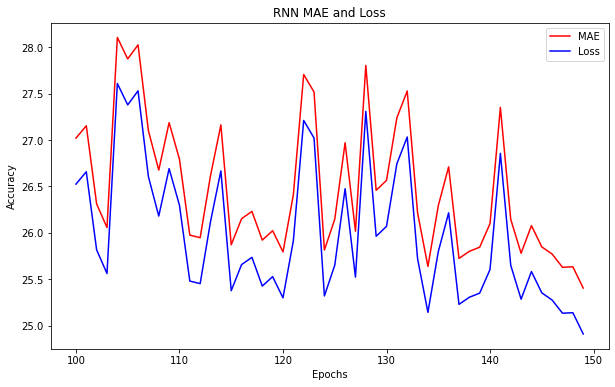

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_rnn.history['mae']
loss=history_rnn.history['loss']

epochs=range(len(loss)) # Get number of epochs


epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------

plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('RNN MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

# LSTM Model

In [11]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([

  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

# We have inferred from the previouss cell that the preferred Learning rate is 1e-5
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history_lstm = model.fit(train_set,epochs=150)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
25/25 [==============================] - 7s 15ms/step - loss: 56.1512 - mae: 56.6492
Epoch 2/150
25/25 [==============================] - 0s 15ms/step - loss: 30.6510 - mae: 31.1468
Epoch 3/150
25/25 [==============================] - 0s 15ms/step - loss: 23.5764 - mae: 24.0704
Epoch 4/150
25/25 [==============================] - 0s 15ms/step - loss: 20.7239 - mae: 21.2167
Epoch 5/150
25/25 [==============================] - 0s 15ms/step - loss: 19.9071 - mae: 20.4002
Epoch 6/150
25/25 [==============================] - 0s 15ms/step - loss: 19.4237 - mae: 19.9162
Epoch 7/150
25/25 [==============================] - 1s 16ms/step - loss: 19.1114 - mae: 19.6037
Epoch 8/150
25/25 [==============================] - 0s 15ms/step - loss: 18.8875 - mae: 19.3798
Epoch 9/150
25/25 [==============================] - 0s 15ms/step - loss: 18.8378 - mae: 19.3302
Epoch 10/150
25/25 [==============================] - 0s 15ms/step - loss: 18.8359 - mae: 19.3286
Epoch 11/150
25/25 [=========

# LSTM MAE and Loss

<Figure size 432x288 with 0 Axes>

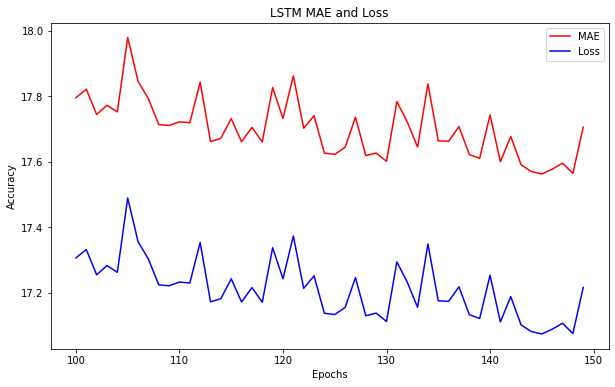

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_lstm.history['mae']
loss=history_lstm.history['loss']

epochs=range(len(loss)) # Get number of epochs

epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------

plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('LSTM MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

# BLSTM Model

In [13]:
# https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session
# A common use-case for clear_session is releasing memory when building models and layers in a loop.
# Clears any internal variables, which means models will not impact later versions of themselves
tf.keras.backend.clear_session()

# This sets the graph-level seed.
# https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/random/set_seed
tf.random.set_seed(51)

# I's for operation level
np.random.seed(51)

# https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session
# A common use-case for clear_session is releasing memory when building models and layers in a loop.
tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# Windowed BI-LSTM
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),# Given a tensor input, this operation inserts a dimension of size 1 at the dimension index axis of input's shape. 
                                                               # https://www.tensorflow.org/api_docs/python/tf/expand_dims
                      input_shape=[None]),     # This means that the model can take sequences of any length

  # The windowed_dataset() return two dimensional batches, with the first being the batch size and the second being the number of timesteps 
  # But the RNN expects three dimensions, so the lambda layer, help fix the difference in dimensions, by adding expannding the array by one dimension

  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),

  # input a sequence and don't output it, except for the last one (sequence to vector RNN), which is the default behavior of Keras TF, 
  # otherwise we set the return_sequence=False and we we'll have (sequence to sequence)

  # The output of the layer is three dimensionals [batch_size * number_units(nulber of units in a cell) * overall_steps(number of cells)]

  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400.0)

  # For example the activation function of the RNN use tanH functino which have values between -1 and 1, 
  # so we multipky the output by 100, so we can have the regular values of our input time series.
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), # Less sensitive to outliers
              optimizer=optimizer,
              metrics=["mae"])
history_blstm = model.fit(dataset, epochs=150)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
78/78 [==============================] - 6s 12ms/step - loss: 28.7541 - mae: 29.2497
Epoch 2/150
78/78 [==============================] - 1s 12ms/step - loss: 25.3496 - mae: 25.8447
Epoch 3/150
78/78 [==============================] - 1s 12ms/step - loss: 25.0914 - mae: 25.5862
Epoch 4/150
78/78 [==============================] - 1s 12ms/step - loss: 25.0713 - mae: 25.5661
Epoch 5/150
78/78 [==============================] - 1s 12ms/step - loss: 24.9099 - mae: 25.4046
Epoch 6/150
78/78 [==============================] - 1s 12ms/step - loss: 25.0104 - mae: 25.5050
Epoch 7/150
78/78 [==============================] - 1s 12ms/step - loss: 25.0212 - mae: 25.5158
Epoch 8/150
78/78 [==============================] - 1s 12ms/step - loss: 24.9505 - mae: 25.4453
Epoch 9/150
78/78 [==============================] - 1s 12ms/step - loss: 25.0404 - mae: 25.5350
Epoch 10/150
78/78 [==============================] - 1s 12ms/step - loss: 24.9379 - mae: 25.4325
Epoch 11/150
78/78 [=========

# BLSTM MAE & Loss

<Figure size 432x288 with 0 Axes>

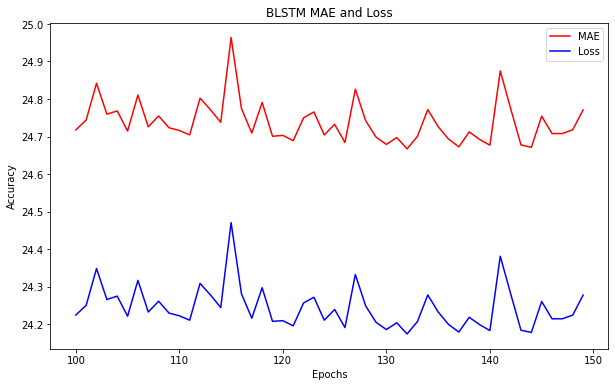

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_blstm.history['mae']
loss=history_blstm.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------


epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]


plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('BLSTM MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

# CNN LSTM Model

In [15]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size) # We take a window of x_train
print("train_set= ",train_set)
print("\n x_train.shape= ",x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]), # We have specified the input shape here so we need to change the windowed_dataset()
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history_cnn_lstm = model.fit(train_set, epochs=150)


train_set=  <PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>

 x_train.shape=  (2500,)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
10/10 [==============================] - 28s 27ms/step - loss: 46.9033 - mae: 47.4005
Epoch 2/150
10/10 [==============================] - 0s 26ms/step - loss: 29.1838 - mae: 29.6789
Epoch 3/150
10/10 [==============================] - 0s 26ms/step - loss: 25.4634 - mae: 25.9582
Epoch 4/150
10/10 [==============================] - 0s 25ms/step - loss: 23.5775 - mae: 24.0716
Epoch 5/150
10/10 [==============================] - 0s 28ms/step - loss: 22.0673 - mae: 22.5608
Epoch 6/150
10/10 [==============================] - 0s 28ms/step - loss: 21.3314 - mae: 21.8244
Epoch 7/150
10/10 [==============================] - 0s 28ms/step - loss: 20.7313 - mae: 21.2242
Epoch 8/150
10/10 [==============================] - 0s 28ms/step - loss: 20.2809 - mae: 20.7735
Epoch 9/150
10/10 [==============================] - 0s 27ms/step - loss: 19.9463 - mae: 20.4390
Epoch 10/150
10/10 [==============================] - 0s 27ms/step - loss: 19.7937 - mae: 20.2865
Epoch 11/150
10/10 [========

# CNN LSTM MAE & Loss

<Figure size 432x288 with 0 Axes>

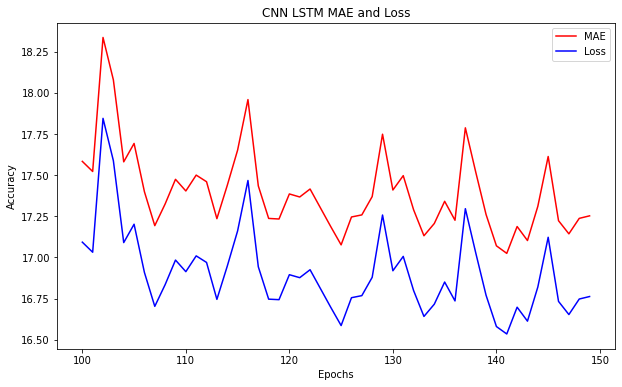

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_cnn_lstm.history['mae']
loss=history_cnn_lstm.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------


epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]


plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('CNN LSTM MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

# CNN BLSTM Model

In [17]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# Windowed CNN BLSTM
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),    
  
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),



  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),

  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400.0)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), 
              optimizer=optimizer,
              metrics=["mae"])
history_cnn_blstm = model.fit(dataset, epochs=150)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
10/10 [==============================] - 7s 36ms/step - loss: 50.5476 - mae: 51.0455
Epoch 2/150
10/10 [==============================] - 1s 43ms/step - loss: 38.3857 - mae: 38.8825
Epoch 3/150
10/10 [==============================] - 0s 37ms/step - loss: 30.3454 - mae: 30.8410
Epoch 4/150
10/10 [==============================] - 1s 38ms/step - loss: 25.8490 - mae: 26.3433
Epoch 5/150
10/10 [==============================] - 1s 37ms/step - loss: 23.7558 - mae: 24.2501
Epoch 6/150
10/10 [==============================] - 1s 38ms/step - loss: 22.4351 - mae: 22.9286
Epoch 7/150
10/10 [==============================] - 0s 36ms/step - loss: 21.5131 - mae: 22.0065
Epoch 8/150
10/10 [==============================] - 1s 44ms/step - loss: 20.8321 - mae: 21.3248
Epoch 9/150
10/10 [==============================] - 1s 45ms/step - loss: 20.3844 - mae: 20.8771
Epoch 10/150
10/10 [==============================] - 1s 43ms/step - loss: 20.0743 - mae: 20.5671
Epoch 11/150
10/10 [=========

# CNN BLSTM MAE and Loss

<Figure size 432x288 with 0 Axes>

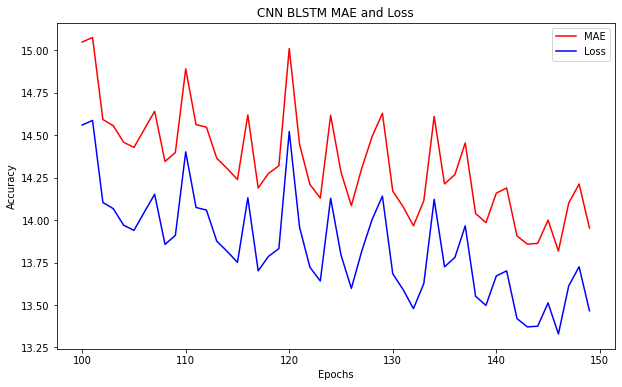

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_cnn_blstm.history['mae']
loss=history_cnn_blstm.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------


epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]


plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('CNN BLSTM MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()